# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the TAs do the grading more conveniently, please use Lionmail to join Kaggle and use UNI as your username.

Visit the website for this competition to join: 
[https://www.kaggle.com/t/8dd419892b1c49a3afb0cea385a7e677](https://www.kaggle.com/t/8dd419892b1c49a3afb0cea385a7e677)

Details about this in-class competition is shown on the website above. Please read carefully.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source). General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. 
3. (A) Report your results on the Kaggle, for comparison with other students' optimization results (you should do this several times). (C) Save your best model, using BitBucket, at the same time when you (B) submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented.

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (possible several) of the .csv prediction file throught the Kaggle platform;**. You should start doing this VARY early, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through instructor-owned private BitBucket repo.**

**Description of (C):** 
For this task, you will be utilizing bitbucket to save your model for submission. Bitbucket provides Git code managment. For those who are not familiar with git operations, please check [Learn Git with Bitbucket Cloud](https://www.atlassian.com/git/tutorials/learn-git-with-bitbucket-cloud) as reference.
**TAs will create a private Bitbucket repository for each student, with the write access. This repo will be owned by the instructors. Make sure to properly submit your model to that exact repository (submissions to your own private repository will not count)** Students need to populate the following file to provide instructors with bitbucket account information: https://docs.google.com/spreadsheets/d/1_7cZjyr34I2y-AD_0N5UaJ3ZnqdhYcvrdoTsYvOSd-g/edit#gid=0.

<span style="color:red">__Submission content:__ :</span>
(i) Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the  BitBucket. Store your model in the folder named "__KaggleModel__" within the BitBucket repository. 
Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [16]:
## Import training set

import glob

paths = [ "kaggle/train_128/0/*.png" , "kaggle/train_128/1/*.png" ,\
         "kaggle/train_128/2/*.png" ,  "kaggle/train_128/3/*.png" , \
         "kaggle/train_128/4/*.png"]   


X_train = np.empty((15000,64,64,3))
y_train = np.empty(15000)

for i, path in enumerate(paths):
    filenames = glob.glob(path)
    temp = np.empty((len(filenames), 64, 64,3))
    print(str(len(filenames)) + ' images in batch'  )
    for j, fname in enumerate(filenames):
        img = Image.open(fname)
        img = img.resize((64,64),Image.NEAREST)
        arr = np.array(img)
        X_train[(3000*i) + j] = arr / 255
        y_train[(3000*i) + j] = i
    print(path[-7])
    



3000 images in batch
0
3000 images in batch
1
3000 images in batch
2
3000 images in batch
3
3000 images in batch
4


In [17]:
num_train = 14200 
num_val = 800
num_dev = 100

reshape = np.random.permutation(X_train.shape[0])

X_train = X_train[reshape]
y_train = y_train[reshape]

mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]



# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image


print(X_train.shape, X_val.shape, X_dev.shape)

(14200, 64, 64, 3) (800, 64, 64, 3) (100, 64, 64, 3)


## Train your model here

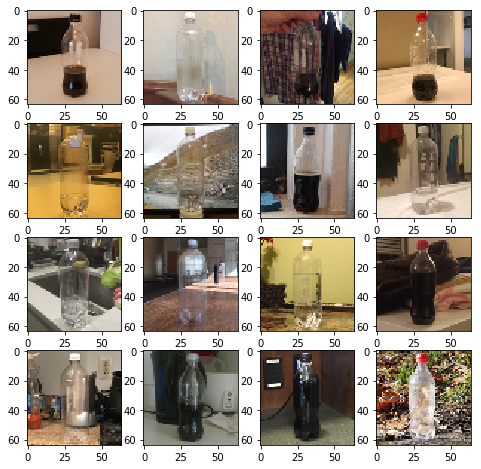

In [19]:
from ecbm4040.image_generator import ImageGenerator

## Showing the raw images 

dev_gen = ImageGenerator(X_dev , y_dev)
dev_gen.show()

del dev_gen
Train_X_Gen = ImageGenerator(X_train , y_train)

In [18]:
from ecbm4040.neuralnets.kaggle import my_training
import tensorflow as tf

tf.reset_default_graph()
result , cache = my_training(X_train, y_train, X_val, y_val, 
             conv_featmap=[10],
             fc_units=[84, 84],
             conv_kernel_size=[5],
             pooling_size=[2],
             l2_norm= .0001,
             seed=235,
             use_adam = True,
             learning_rate= .001,
             epoch=20,
             batch_size=245,
             verbose=False,
             pre_trained_model= None)


Building my LeNet. Parameters: 
conv_featmap=[10]
fc_units=[84, 84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.0001
seed=235
learning_rate=0.001
number of batches for training: 57
epoch 1 
epoch 2 
Best validation accuracy! iteration:100 accuracy: 71.25%
epoch 3 
epoch 4 
Best validation accuracy! iteration:200 accuracy: 76.0%
epoch 5 
epoch 6 
Best validation accuracy! iteration:300 accuracy: 78.5%
epoch 7 
epoch 8 
Best validation accuracy! iteration:400 accuracy: 80.75%
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:600 accuracy: 82.25%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:1000 accuracy: 82.375%
epoch 19 
epoch 20 
Traning ends. The best valid accuracy is 82.375. Model named lenet_1509920077.


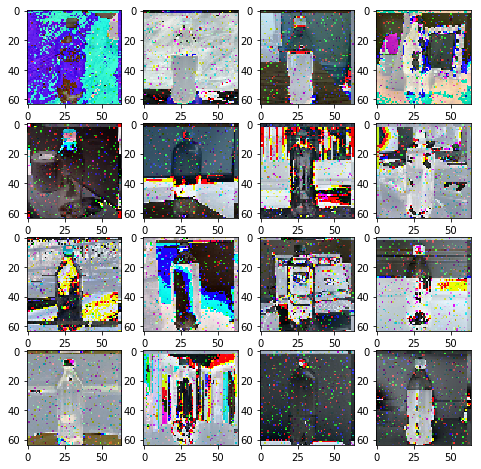

In [10]:
mod = False # does not improve

if mod:
    Train_X_Gen.add_noise(portion= .05 , amplitude= .3)
    Train_X_Gen.translate(shift_height= 3 , shift_width = -3)
    
Train_X_Gen.show()

In [20]:
from ecbm4040.neuralnets.kaggle import my_training_generator
import tensorflow as tf

fc_units     = [64, 84,  128, 256, 512, 1024]
kernel_sizes = [2, 5 ,10, 15]
l2_penalties = [.00001, .0001 , .001, .01, .1]
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
batch_sizes    = [50, 75, 150, 250, 400]
pooling_size   = [1, 2, 5, 7, 10]
conv_features  = [3 , 5 , 10 , 15, 30  ]

results = list()
parameters = list()

for i in range(10):
    
    tf.reset_default_graph()
    k = np.random.choice(kernel_sizes, size = (2))
    l = np.random.choice(l2_penalties)
    r = np.random.choice(learning_rates)
    b = np.random.choice(batch_sizes)
    p = np.random.choice(pooling_size, size = (2))
    f = np.random.choice(conv_features, size=(2))
    u = np.random.choice(fc_units, size = (2))
    print('iteration ' + str(i) + ': \n')
    print('kernel size: ' + str(k)+ '\n')
    print('penalty: ' + str(l)+ '\n')
    print('learning rate: ' + str(r)+ '\n')
    print('batch size: ' + str(b)+ '\n')


    result , cache = my_training_generator(Train_X_Gen, X_val, y_val, 
             conv_featmap= f,
             fc_units= u,
             conv_kernel_size=k,
             pooling_size= p,
             l2_norm= l,
             seed=235,
             use_adam = True,
             learning_rate= r,
             epoch=10,
             batch_size=b,
             verbose=False,
             pre_trained_model=None)
    
    results.append(result)
    parameters.append(cache)

iteration 0: 

kernel size: [15  2]

penalty: 0.01

learning rate: 0.01

batch size: 150

Building my LeNet. Parameters: 
conv_featmap=[30 15]
fc_units=[ 64 256]
conv_kernel_size=[15  2]
pooling_size=[10  7]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 94
epoch 1 
epoch 2 
Best validation accuracy! iteration:100 accuracy: 61.875%
epoch 3 
Best validation accuracy! iteration:200 accuracy: 70.5%
epoch 4 
epoch 5 
Best validation accuracy! iteration:400 accuracy: 73.25%
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:700 accuracy: 75.375%
epoch 9 
epoch 10 
Best validation accuracy! iteration:900 accuracy: 76.125%
Traning ends. The best valid accuracy is 76.125. Model named lenet_1509920155.
iteration 1: 

kernel size: [5 2]

penalty: 0.1

learning rate: 0.1

batch size: 250

Building my LeNet. Parameters: 
conv_featmap=[15 10]
fc_units=[512  64]
conv_kernel_size=[5 2]
pooling_size=[7 1]
l2_norm=0.1
seed=235
learning_rate=0.1
number of batches fo

In [22]:
best = [i for i, r in enumerate(results) if r > 80]
print(len(best))
for b in best:
    print(parameters[b])

2
['lenet_1509920238', array([10, 15]), array([ 64, 256]), array([15, 10]), array([5, 7]), 0.001, 235, 0.01, 10, 250, False, None, True]
['lenet_1509920401', array([30,  3]), array([128,  64]), array([ 5, 15]), array([5, 7]), 1.0000000000000001e-05, 235, 0.001, 10, 250, False, None, True]


In [24]:
from ecbm4040.neuralnets.kaggle import my_training_generator
import tensorflow as tf

fc_units     = [64, 128, 256]
kernel_sizes = [5 ,10, 15]
l2_penalties = [.00001, .0001 , .001, .01, .1]
learning_rates = [1e-2, 1e-3]
batch_sizes    = [50, 75, 150, 250, 400]
pooling_size   = [4,5,6,7,8]
conv_features  = [3 , 5 , 10 , 15, 30  ]

results = list()
parameters = list()

for i in range(10):
    
    tf.reset_default_graph()
    k = np.random.choice(kernel_sizes, size = (2))
    l = np.random.choice(l2_penalties)
    r = np.random.choice(learning_rates)
    b = np.random.choice(batch_sizes)
    p = np.random.choice(pooling_size, size = (2))
    f = np.random.choice(conv_features, size=(2))
    u = np.random.choice(fc_units, size = (2))
    print('iteration ' + str(i) + ': \n')
    print('kernel size: ' + str(k)+ '\n')
    print('penalty: ' + str(l)+ '\n')
    print('learning rate: ' + str(r)+ '\n')
    print('batch size: ' + str(b)+ '\n')


    result , cache = my_training_generator(Train_X_Gen, X_val, y_val, 
             conv_featmap= f,
             fc_units= u,
             conv_kernel_size=k,
             pooling_size= p,
             l2_norm= l,
             seed=235,
             use_adam = True,
             learning_rate= r,
             epoch=20,
             batch_size=b,
             verbose=False,
             pre_trained_model=None)
    
    results.append(result)
    parameters.append(cache)

iteration 0: 

kernel size: [10 10]

penalty: 1e-05

learning rate: 0.001

batch size: 75

Building my LeNet. Parameters: 
conv_featmap=[5 3]
fc_units=[128 128]
conv_kernel_size=[10 10]
pooling_size=[6 5]
l2_norm=1e-05
seed=235
learning_rate=0.001
number of batches for training: 189
epoch 1 
Best validation accuracy! iteration:100 accuracy: 60.25%
epoch 2 
Best validation accuracy! iteration:200 accuracy: 69.25%
Best validation accuracy! iteration:300 accuracy: 72.25%
epoch 3 
Best validation accuracy! iteration:400 accuracy: 73.5%
Best validation accuracy! iteration:500 accuracy: 74.875%
epoch 4 
Best validation accuracy! iteration:600 accuracy: 77.125%
Best validation accuracy! iteration:700 accuracy: 77.375%
epoch 5 
Best validation accuracy! iteration:800 accuracy: 79.0%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 80.875%
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 81.0%
epoch 8 
epoch 9 
Best validation accuracy! iteration:1600 accuracy: 82.0%
Best 

epoch 1 
epoch 2 
epoch 3 
Best validation accuracy! iteration:100 accuracy: 73.25%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:200 accuracy: 78.0%
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:300 accuracy: 79.5%
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:400 accuracy: 80.125%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:600 accuracy: 80.25%
epoch 19 
epoch 20 
Traning ends. The best valid accuracy is 80.25. Model named lenet_1509922176.
iteration 8: 

kernel size: [10  5]

penalty: 0.1

learning rate: 0.01

batch size: 250

Building my LeNet. Parameters: 
conv_featmap=[15  3]
fc_units=[128 256]
conv_kernel_size=[10  5]
pooling_size=[4 6]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 56
epoch 1 
epoch 2 
Best validation accuracy! iteration:100 accuracy: 55.125%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:4

In [25]:
results

[82.375, 84.75, 80.75, 79.75, 83.0, 80.25, 77.25, 80.25, 68.25, 83.375]

In [26]:
# show the graph
from ecbm4040.neuralnets.cnn_jupyter_tensorboard import show_graph 

tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/lenet_1509843731.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

## Save your best model

In [109]:
## Import testset

import glob
path = "kaggle/test_128/*.png"


X_test = np.empty((3500 , 64,64,3))

filenames = glob.glob(path)
temp = np.empty((len(filenames), 64, 64,3))
print(str(len(filenames)) + ' images in batch'  )
for j, fname in enumerate(filenames):
        img = Image.open(fname)
        img = img.resize((64,64),Image.NEAREST)
        arr = np.array(img)
        X_test[j] = arr / 255
    
# subtract the mean
X_test = X_test.astype(np.float32) - mean_image



3500 images in batch


In [143]:
###
# submission 1: lenet_1509903621.meta

###

tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/lenet_1509903621.meta')
    saver.restore(sess, tf.train.latest_checkpoint('model/'))

    graph = tf.get_default_graph()
    
    tf_input = graph.get_operations()[0].name+":0"
    x = graph.get_tensor_by_name(tf_input)
    print(x)
    
    tf_output = "fc_layer_1/Add:0"
    y = graph.get_tensor_by_name(tf_output)
    print(y)
    
    prediction=tf.argmax(y,1)
    y_out = prediction.eval(feed_dict={x: X_test  })
    

INFO:tensorflow:Restoring parameters from model/lenet_1509903621
Tensor("inputs/Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Tensor("fc_layer_1/Add:0", shape=(?, 10), dtype=float32)


In [144]:
y_out

array([0, 1, 0, ..., 2, 1, 2])

## Generate .csv file for Kaggle

In [140]:
# The following code snippet can be used to generate your prediction .csv file.

import csv

with open('predicted.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()    
    for index,l in enumerate(y_out):
         filename = filenames[index][16:-4] + ".png"
         label = str(l)
         writer.writerow({'Id': filename, 'label': label})